In [2]:
import numpy as np

In [1]:
class Linear_Regression:

  def __init__(self,lr,no_iter  ):
    self.lr=lr
    self.no_iter=no_iter

  def fit(self,x,y):
    self.m,self.n=x.shape

    self.w = np.zeros(self.n)
    self.b=0
    self.x=x
    self.y=y

    #implementing gradient descent

    for i in range(self.no_iter):
      self.update_weights()



  def update_weights(self,):
    y_pred=self.predict(self.x)

    #calculate gradient

    dw=-(2*(self.x.T).dot(self.y-y_pred))/self.m
    db=-2*np.sum(self.y-y_pred)/self.m

    #update weights

    self.w=self.w-self.lr*dw
    self.b=self.b-self.lr*db


  def predict(self,x):

    return x.dot(self.w)+self.b



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [6]:
df=pd.read_csv(r'C:\Users\Sxm01\OneDrive\Desktop\Sameera_pu\Datasets\SALARY_LR\salary_data.csv')

In [7]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [8]:
df.shape

(30, 2)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


In [11]:
x=df.iloc[:,:-1]
y=df.iloc[:,1].values

In [12]:
print(y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


In [13]:
print(x)

    YearsExperience
0               1.1
1               1.3
2               1.5
3               2.0
4               2.2
5               2.9
6               3.0
7               3.2
8               3.2
9               3.7
10              3.9
11              4.0
12              4.0
13              4.1
14              4.5
15              4.9
16              5.1
17              5.3
18              5.9
19              6.0
20              6.8
21              7.1
22              7.9
23              8.2
24              8.7
25              9.0
26              9.5
27              9.6
28             10.3
29             10.5


In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=2)

In [15]:
model=Linear_Regression(lr=0.02,no_iter=10000)

In [16]:
model.fit(x_train,y_train)

In [24]:
print('weight=',model.w[0])
print('bias=',model.b)

weight= 9512.944987627436
bias= 23707.81324657524


C:\Users\Sxm01\AppData\Local\Temp\ipykernel_5320\2358650954.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('weight=',model.w[0])


In [18]:
test_data_pred=model.predict(x_test)
print(test_data_pred)


1      36074.641730
0      34172.052733
14     66516.065691
9      58905.709701
21     91249.722659
19     80785.483172
23    101713.962145
6      52246.648209
3      42733.703222
20     88395.839162
dtype: float64


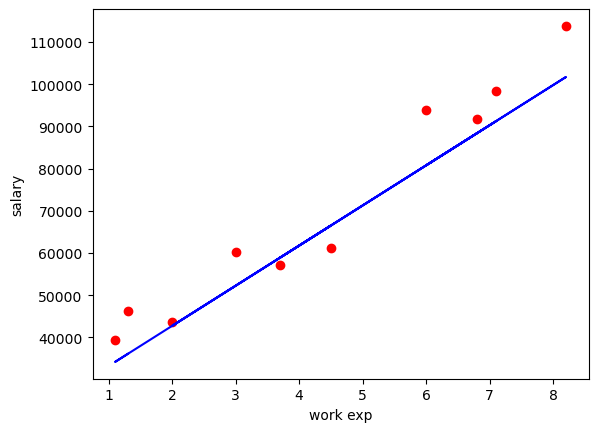

In [19]:
plt.scatter(x_test,y_test,color='red')
plt.plot(x_test,test_data_pred,color='blue')
plt.xlabel('work exp')
plt.ylabel('salary')
plt.show()